## ANOVA (분산분석)

### ANOVA (분석분석) : Analysis of Variance
- 평균이 아닌 분산을 사용하여 차이 검정 수행하는 방법   
- 세 개 이상의 다수 집단 간 평균을 비교하는 통계분석 방법
    - T-검정 : 두 집단 간의 평균 차이 비교하는 통계분석 방법  
- 집단 내 분산(차이)보다 다른 집단과의 분산(차이)이 더 크다면 유의하다고 판단  
- 분산분석 유형  
    - 단일변량 분산분석  
        - 일원 분산분석 : 독립변수 1개,  종속변수 1개 (종속변수에 영향을 주는 요인이 1개)  
        - 이원 분산분석 : 독립변수 2개,  종속변수 1개 (종속변수에 영향을 주는 요인이 2개)   
        - 다원 분산분석 : 독립변수 3개 이상,  종속변수 1개  
    - 다변량 분산분석  
        - MANOVA : 독립변수 1개 이상,  종속변수 2개 이상  
- 종속변수 : 연속형
- 독립변수 : 범주형 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

### (1) 일원 분산분석 (One-way ANOVA)
- 세 개 이상의 집단으로 구성된 하나의 독립변수에 따라 종속변수의 평균이 유의미한 차이가 있는지 검증 
    - 일원 분산분석 : 독립변수 1개, 종속변수 1개 
    - 하나의 독립변수가 세 개 이상의 범주 포함 (세 집단 이상)
        - 예: iris 데이터 target에 3개 품종 포함 : setosa, versicola, virginica   
- F 검정 통계량 이용 : 평균 제곱율에 기반  
    - F-value = 집단 간 분산 / 집단 내 분산  
    - 평균의 차이 계산이 아니라 분산의 비율값 
    - 집단 내 분산보다 집단 간 분산이 크면 F 값 커지고 귀무가설 기각 확률 높아짐  
    - 즉, k개의 집단의 차이가 있다고 할 확률이 높아진다고 할 수 있음 
    
---
- 가정
    - (1) 집단의 관측치는 서로 독립적이며, 정규분포를 따른다   
    - (2) 집단 관측치의 분산은 같다 (등분산 가정)  
    
---
- 가설 
    - 귀무가설(H0) : k개의 집단 간 모평균의 값이 차이가 없다 (같다)
    - 대립가설(H1) : k개의 집단 간 모평균의 값이 차이가 있다 (같지 않다)
    
---
- 사후검정 (Post-hoc)
    - 분산분석의 결과 귀무가설이 기각되어 
    - 적어도 한 집단에서 평균의 차이가 있음이 통계적으로 증명되었을 경우
        - 즉, p-value < 0.05 인 경우
    - (평균의 차이가 없으면 사후 검정 진행하지 않음)  
    - 어떤 집단들에 대해 평균의 차이가 존재하는지를 알아보기 위해 수행하는 분석
    - 튜키의 HSD 사용 

--- 
- 일원 분산분석 수행 단계
    - 정규성 검정 (Yes) -> 등분산 검정 (Yes) -> ANOVA 검정 stats.t_oneway() 수행  
    - 비정규성인 경우 -> stat.kruskal() 수행  
    - 비등분산성인 경우 -> pg.welch_anova() 수행   

### 일원 분산분석 예제
- iris 데이터 사용 
- 품종별 꽃받침의 너비(Sepal Width)의 평균이 같은지 확인  
- 일원 분산분석 : 독립변수 1개, 종속변수 1개 
- 1개의 독립변수가 세 개의 범주 포함 : setosa, versicola, virginica
- (1) 데이터 로드 / 분포 확인  
- (2) 가설 수립
- (3) 정규성 검정
- (4) 등분산 검정
- (5) ANOVA 검정 : f_oneway() 사용
- (6) 사후 검정 

#### (1) 데이터 로드 / 분포 확인  

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
data = pd.read_csv('./data/iris.csv')
data.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data["target"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
data.target.value_counts()

target
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [5]:
# target 별 "sepal width" 값 변수에 저장 
target_list = data["target"].unique()
setosa = data[data["target"]==target_list[0]]["sepal width"]
versicolor = data[data["target"]==target_list[1]]["sepal width"]
virginica = data[data["target"]==target_list[2]]["sepal width"]
print(target_list)


['setosa' 'versicolor' 'virginica']


In [6]:
# setosa

<Axes: xlabel='target', ylabel='sepal width'>

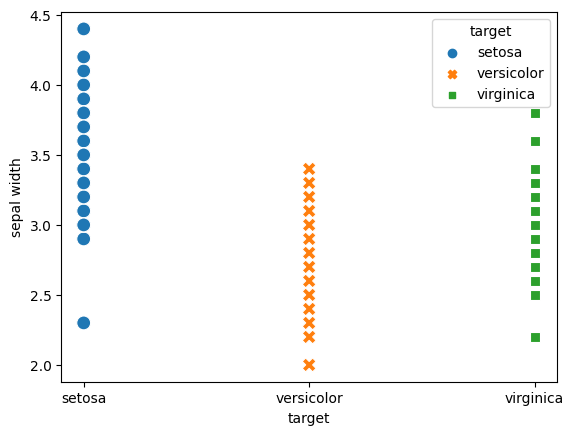

In [7]:
# 시각화해서 타깃값 분포 확인 
import seaborn as sns
import matplotlib.pyplot as plt
# Scatter plot by Groups
sns.scatterplot(x='target', 
                y='sepal width', 
                hue='target', # different colors by group
                style='target', # different shapes by group
                s=100, # marker size
                data=data)
# plt.legend()
plt.show()

# 품종간 평균의 차이가 있어 보임
# 통계적으로 차이가 있는지 검정 

#### (2) 가설 수립
- 귀무가설(H0) : 세가지 종에 대해 Sepal Width의 평균은 모두 같다
- 대립가설(H1) : 세가지 종에 대해 Sepal Width의 평균은 차이가 있다 (같지 않다)

#### (3) 정규성 검정

In [8]:
# 각 변수가 정규성을 만족하는지 확인 
# 귀무가설(H0) : 데이터가 정규분포를 따른다
# 대립가설(H1) : 데이터가 정규분포를 따르지 않는다 

from scipy.stats import shapiro

shapiro(setosa)
shapiro(versicolor)
shapiro(virginica)

# 다들 정규분포 따르는 듯

ShapiroResult(statistic=0.9686915278434753, pvalue=0.20464898645877838)

ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)

ShapiroResult(statistic=0.9673907160758972, pvalue=0.18089857697486877)

#### (4) 등분산 검정

In [9]:
# 정규분포이므로 Bartlett 사용 (데이터 수 달라도 가능)

from scipy.stats import bartlett

bartlett(setosa, versicolor, virginica)

# 등분산 가정 맞는듯

BartlettResult(statistic=2.2158125491551637, pvalue=0.3302496898960959)

In [10]:
# 참고로 Levene도 사용

from scipy.stats import levene

levene(setosa, versicolor, virginica)

# 얘도 맞는듯

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

#### (5) ANOVA 검정 : f_oneway() 사용

In [11]:
# 귀무가설(H0) : 세 가지 종에 대해 Sepal Width의 평균은 모두 같다
# 대립가설(H1) : 세 가지 종에 대해 Sepal Width의 평균은 차이가 있다 (같지 않다)

from scipy.stats import f_oneway

f_oneway(setosa, versicolor, virginica)

# 확실히 얘네들은 다름

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

#### (6) 사후 검정 
- 어떤 집단들에 대해 평균의 차이가 존재하는지를 알아보기 위해 수행하는 분석
- 즉, 세 가지 종들 중 어떤 종의 꽃받침 너비가 차이가 있는지 파악하기 위해 수행 
- 가설
    - 귀무가설(H0) : 집단들 사이의 평균은  같다
    - 대립가설(H1) : 집단들 사이의 평균은 같지 않다  
- 모든 집단 수준에 대하여 두 집단씩 짝을 지어 각각 다중 비교 수행 
    - 예 : (setosa, versicola), (setosa, virginica), (versicola, virginica)
- 튜키의 HSD : 비교 대상 표본수가 동일한 경우에만 사용 가능 
    - 모든 집단 조합에 대하여 분석 
    - 표본수가 동일한 경우 가장 많이 사용되는 사후검정 방법 
- 집단별로 표본의수는 다르지만 등분산성은 만족하는 경우
    - Fisher's LSD, Bonferroni, Scheffe 사용   
- 집단별로 표본수도 다르고, 등분산성도 만족하지 않는 경우
    - Games-Howell, Dunnett T3 등 사용  

In [12]:
!pip install statsmodels

In [15]:
# 튜키의 HSD(Tuckey's Honestly Significant Difference : 진정으로 유의미한 차이) 사용 

from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(data=data['sepal width'], groups=data['target'])
hsd = mc.tukeyhsd(alpha=0.05)
hsd.summary()

# 여기선 p-adj가 p-value를 뜻함
# 다들 유의미한 차이가 난다

# meandiff : 오른쪽 집단 - 왼쪽 집단
# reject : 평균에서 유의미한 차이가 있는가

group1,group2,meandiff,p-adj,lower,upper,reject
setosa,versicolor,-0.648,0.0,-0.8092,-0.4868,True
setosa,virginica,-0.444,0.0,-0.6052,-0.2828,True
versicolor,virginica,0.204,0.009,0.0428,0.3652,True


In [20]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

hsd = pairwise_tukeyhsd(data['sepal width'], data['target'], alpha=0.05)
hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
setosa,versicolor,-0.648,0.0,-0.8092,-0.4868,True
setosa,virginica,-0.444,0.0,-0.6052,-0.2828,True
versicolor,virginica,0.204,0.009,0.0428,0.3652,True


### 정규성을 만족하지 못하는 경우 : kruskal 검정 수행 
- kruskal-wallis test 사용 

In [18]:
from scipy.stats import kruskal
kruskal(setosa, versicolor, virginica)

KruskalResult(statistic=62.49463010053111, pvalue=2.6882119006774528e-14)

### 등분산성을 만족하지 못하는 경우 : welch_anova 분석 수행  

In [22]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=4e83f063e9ba1720732974e7b751a9efe57c9abd5d19571319acf137108ec880
  Stored in directory: /Users/jangseungheon/Library/Caches/pip/wheels/17/8d/65/9a39917567093c895549811c172be5d2dfb63c7e4b143e05a4
Successfully built littleutils


In [23]:
import pingouin as pg
pg.welch_anova(data=data, dv='sepal width', between='target')

# ddof1, ddof2 : 자유도
# F : 검정통계량
# p-unc : p-value

,Source,ddof1,ddof2,F,p-unc,np2
0,target,2,97.369597,43.303381,3.519723e-14,0.391881
